## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
import time
import seaborn as sns
import pandas as pd

from tomo_encoders import Patches
from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
import cupy as cp
from tomo_encoders.reconstruction.project import get_projections
from tomo_encoders.reconstruction.recon import recon_binning
from tomo_encoders.misc.voxel_processing import cylindrical_mask, normalize_volume_gpu


##################################################
Found existing tiff folder: train_y
Dataset shape: (768, 5120, 5120)


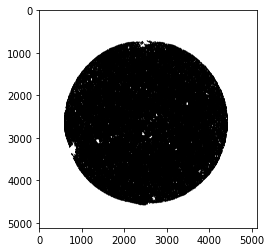

In [2]:
ds1 = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/train_y', tiff = True)
plt.imshow(ds1.read_slice(axis = 0, slice_idx = 384), cmap = 'gray')


##################################################
Found existing tiff folder: train_x
Dataset shape: (768, 5120, 5120)
min 0.0; max 0.9781490564346313


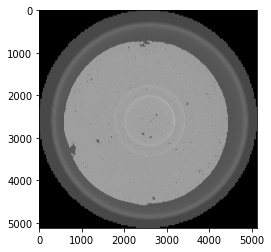

In [3]:
ds1 = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/train_x', tiff = True)
tmp_img = ds1.read_slice(axis = 0, slice_idx = 384)
plt.imshow(tmp_img, cmap = 'gray')
print(f'min {tmp_img.min()}; max {tmp_img.max()}')

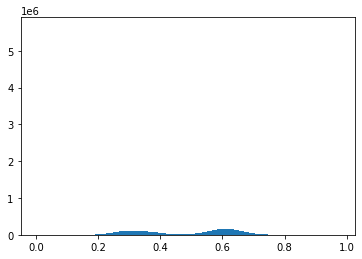

In [4]:
h = plt.hist(tmp_img.reshape(-1), bins = 500)


##################################################
Found existing tiff folder: train_x_rec
Dataset shape: (768, 5120, 5120)
min 0.0; max 0.9432004690170288


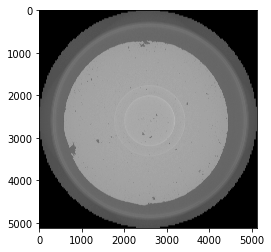

In [5]:
ds1 = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/train_x_rec', tiff = True)
tmp_img = ds1.read_slice(axis = 0, slice_idx = 384)
plt.imshow(tmp_img, cmap = 'gray')
print(f'min {tmp_img.min()}; max {tmp_img.max()}')

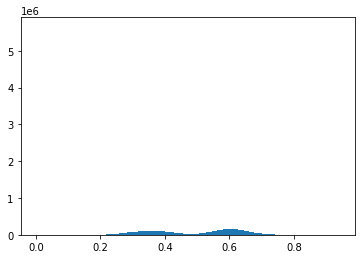

In [6]:
h = plt.hist(tmp_img.reshape(-1), bins = 500)